<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PyOD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pyod


     |████████████████████████████████| 111 kB 28.3 MB/s 
  Created wheel for pyod: filename=pyod-0.9.4-py3-none-any.whl size=130726 sha256=35200c0a5113f1b0652cea8ce7366c1d4c0f8924113451bf870ee49f892d3623
  Stored in directory: /root/.cache/pip/wheels/50/32/84/d64079e8bf087c1b231c9beecfa9abc08592ab5f5f333124cd
Successfully built pyod


In [3]:
import numpy as np 
import pandas as pd 


In [6]:
data=pd.read_csv('BigMart.csv')

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.shape

(8523, 12)

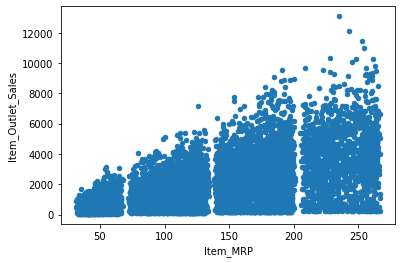

In [10]:
import matplotlib.pyplot as plt
data.plot.scatter('Item_MRP','Item_Outlet_Sales')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data[['Item_MRP','Item_Outlet_Sales']] = scaler.fit_transform(data[['Item_MRP','Item_Outlet_Sales']])

In [13]:
data[['Item_MRP','Item_Outlet_Sales']].head()

,Item_MRP,Item_Outlet_Sales
0,0.927507,0.283587
1,0.072068,0.031419
2,0.468288,0.158115
3,0.640093,0.053555
4,0.095805,0.073651


In [14]:
X1=data['Item_MRP'].values.reshape(-1,1)
X2=data['Item_Outlet_Sales'].values.reshape(-1,1)

In [15]:
X=np.concatenate((X1,X2),axis=1)

In [16]:
X

array([[0.92750715, 0.28358666],
       [0.0720684 , 0.03141895],
       [0.46828841, 0.15811486],
       ...,
       [0.22849221, 0.08885035],
       [0.30493925, 0.13883505],
       [0.18750976, 0.05610527]])

In [18]:
#import all the models 
from pyod.models.abod import ABOD #(angle based outlier detection )
from pyod.models.cblof import CBLOF # cluster based 
from pyod.models.hbos import HBOS
from pyod.models.lof import LOF
from pyod.models.mcd import MCD

In [21]:
random_state=np.random.RandomState(21)
outlier_fraction=0.05
classifiers={
    'Angle Based Outlier Detection (ABOD)':ABOD(contamination=outlier_fraction),
    'Custer Based Outlier Factor (CBLOF)': CBLOF(contamination=outlier_fraction, check_estimator=False,random_state=random_state),
    'Histogram Based Outlier Detection (HBOS)': HBOS(contamination=outlier_fraction),
    'Local Outlier Factor(LOF)': LOF(n_neighbors=35,contamination=outlier_fraction),
    'Minimum Covariance Detection (MCD)': MCD(contamination=outlier_fraction,random_state=random_state)
}

In [22]:
#creating a meshgrid for visualisation 
xx,yy=np.meshgrid(np.linspace(0,1,200),np.linspace(0,1,200))


In [25]:
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.font_manager 

OUTLIERS :  447 INLIERS :  8076 Angle Based Outlier Detection (ABOD)
OUTLIERS :  427 INLIERS :  8096 Custer Based Outlier Factor (CBLOF)
OUTLIERS :  501 INLIERS :  8022 Histogram Based Outlier Detection (HBOS)
OUTLIERS :  392 INLIERS :  8131 Local Outlier Factor(LOF)
OUTLIERS :  427 INLIERS :  8096 Minimum Covariance Detection (MCD)


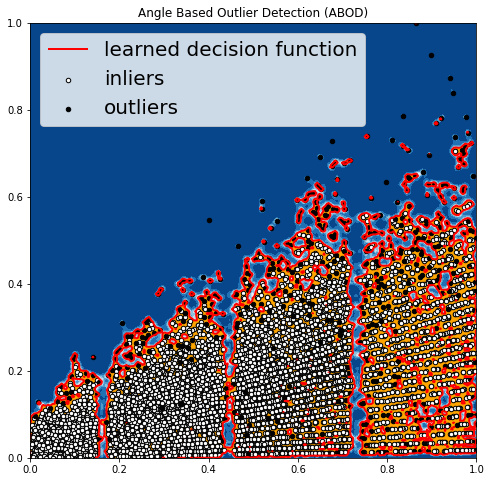

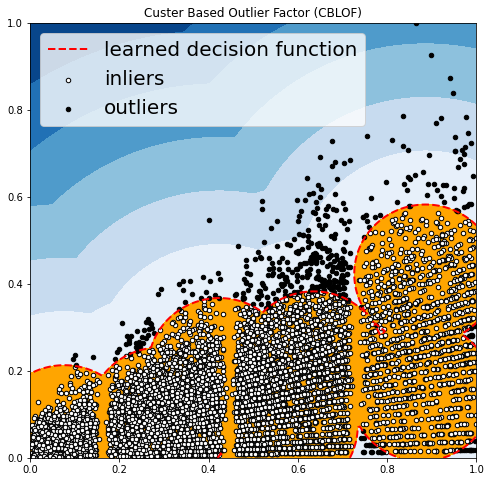

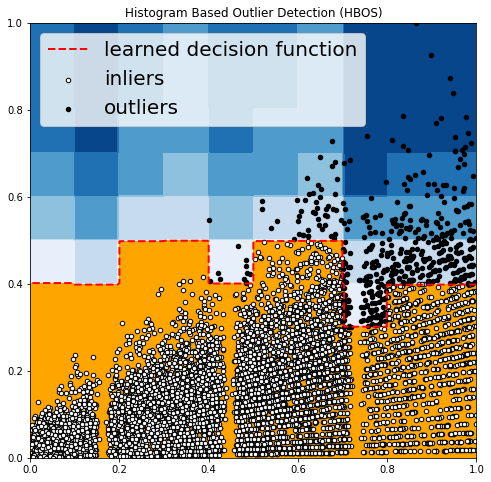

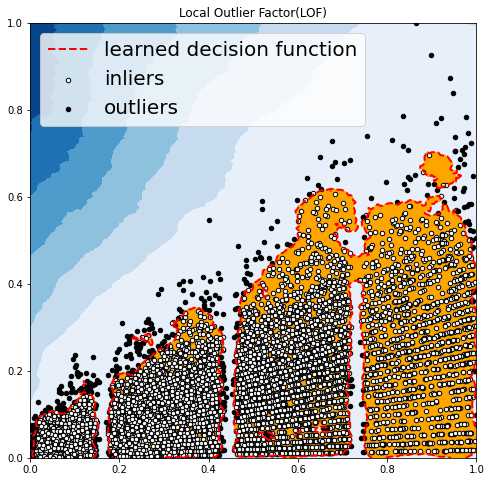

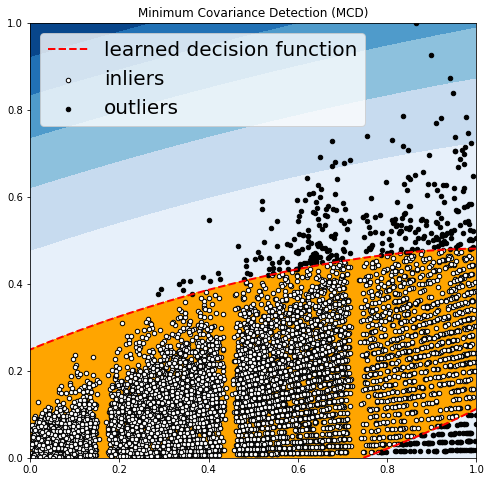

In [29]:
from scipy import stats

import matplotlib.font_manager



for i, (clf_name,clf) in enumerate(classifiers.items()):

  #fitting the model

  clf.fit(X)

  #predict anomaly score

  scores_pred = clf.decision_function(X)*-1

  #prediction of a datapoint category outlier or inlier

  y_pred=clf.predict(X)

  n_inliers = len(y_pred)-np.count_nonzero(y_pred)

  n_outliers = np.count_nonzero(y_pred==1)



  plt.figure(figsize=(8,8))



  dfx=data

  dfx['outlier']=y_pred.tolist()




  IX1 = np.array(dfx['Item_MRP'][dfx['outlier']==0]).reshape(-1,1)

  IX2 = np.array(dfx['Item_Outlet_Sales'][dfx['outlier']==0]).reshape(-1,1)

  

  OX1 = np.array(dfx['Item_MRP'][dfx['outlier']==1]).reshape(-1,1)

  OX2 = np.array(dfx['Item_Outlet_Sales'][dfx['outlier']==1]).reshape(-1,1)
  print('OUTLIERS : ', n_outliers,'INLIERS : ', n_inliers, clf_name)
  threshold= stats.scoreatpercentile(scores_pred,100*outlier_fraction)
  Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])*-1
  Z=Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z,levels=np.linspace(Z.min(), threshold,7),cmap=plt.cm.Blues_r)
  a=plt.contour(xx,yy,Z, levels=[threshold], linewidths=2, colors='red')
  plt.contourf(xx,yy,Z, levels=[threshold,Z.max()], colors='orange')
  b=plt.scatter(IX1,IX2, c='white', s=20,edgecolor='k')
  c=plt.scatter(OX1,OX2, c='black', s=20,edgecolor='k')
  plt.axis('tight')
  plt.legend([a.collections[0],b,c],
             ['learned decision function', 'inliers', 'outliers'],
             prop=matplotlib.font_manager.FontProperties(size=20), 
             loc=2)
  
  plt.xlim((0,1))
  plt.ylim((0,1))
  plt.title(clf_name)